##### Module import

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tableone import TableOne
from forestplot import forestplot

In [21]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [5]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\3월 분석


In [6]:
df = pd.read_csv('2023_03_30_data_step.csv', encoding='cp949')
df.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a144',
       'a146', 'd134', 'd136', 'f073', 'f074', 'h001', 'q001', 'q015', 'q016',
       'q017', 'p001', 'First_Work', 'year', 'Admission', 'Graduation', 'Cur',
       'Cur_Work_date', 'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur',
       'Start_to_End', 'FirstWorkPeriod', 'LongWork', 'LongWork2',
       'major_same', 'major_help', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       '성별', '건강상태', '결혼상태', '대학지역', '전공일치', '본전공', '재학중일자리경험', '삶의만족도_개인',
       '삶의만족도_관계', '삶의만족도_소속집단'],
      dtype='object')

In [7]:
df_1 = df[['pid', 'majorcat', 'province', 'area', 'sex', 'a003', 'a144',
       'a146', 'd134', 'd136', 'f073', 'f074', 'h001', 'q001', 'q015', 'q016',
       'q017', 'p001', 'First_Work', 'year', 'Admission', 'Graduation', 'Cur',
       'Cur_Work_date', 'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur',
       'Start_to_End', 'FirstWorkPeriod', 'LongWork', 'LongWork2',
       'major_same', 'major_help',  'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'age', '성별', '건강상태', '결혼상태', '대학지역',  '전공일치', 'score', '본전공', '재학중일자리경험', '삶의만족도_개인',
       '삶의만족도_관계', '삶의만족도_소속집단']].copy()

모델 Logistic Regression
1. 단변량
2. 인구통계학적 특성
3. 인구통계학 + 전공 연관성, 대학 지역, 학점, 재학 중 경험 일자리(완전 대학 관련)
4. 삶의 만족도(개인, 관계, 소속 집단)
    3-1 삶의 만족도 평균
5. full model
---------------------------------------------------
- 근속 종속변수 : :LongWork, LongWork2가 존재
    - LongWork2가 2년 이상 일한 사람 
    - 2년 ~ 3년 사이 기간을 분석하기로 했으니 Target : LongWork2로 지정해서 사용

##### 다변량 모델

<h6> 1번 인구통계학적특징 로지스틱 </h6>

In [8]:
model_1 = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))''', df_1).fit()
print('==================================Model Summary=========================================')
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.544678
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 5808
Model:                          Logit   Df Residuals:                     5802
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                 0.06110
Time:                        18:35:13   Log-Likelihood:                -3163.5
converged:                       True   LL-Null:                       -3369.4
Covariance Type:            nonrobust   LLR p-value:                 8.731e-87
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -9.1323      0.541    -16.887      0.000     -10.192      -8.072
C(성별, Treatment("여자"))[T.남자]             0.2175      0.072      3.040      0.002       0.077       0.358
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.3406      0.103      3.298      0.001       0.138       0.543
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.0796      0.113      0.702      0.483      -0.143       0.302
C(결혼상태, Treatment("미혼"))[T.기혼]           0.3799      0.202      1.878      0.060      -0.017       0.776
age                                      0.2981      0.021     14.248      0.000       0.257       0.339
========================================================================================================
"""

In [9]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_human = pd.DataFrame(
    {
        "OR": model_1.params,
        "Lower CI": model_1.conf_int()[0],
        "Upper CI": model_1.conf_int()[1],
    }
)
odds_ratios_human = np.exp(odds_ratios_human)
odds_ratios_human

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000108,0.000037,0.000312
"C(성별, Treatment(""여자""))[T.남자]",1.242912,1.080308,1.429991
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.405860,1.148189,1.721357
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.082811,0.867054,1.352258
"C(결혼상태, Treatment(""미혼""))[T.기혼]",1.462103,0.983633,2.173315
age,1.347280,1.293153,1.403673


###### 2번 인구통계 + 대학 생활 로지스틱 회귀모형

In [10]:
model_2 = sm.Logit.from_formula('''LongWork2 ~  age + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment("맞지않다")) 
    + score + C(재학중일자리경험,Treatment('없다'))''', df_1).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.528554
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 5568
Model:                          Logit   Df Residuals:                     5557
Method:                           MLE   Df Model:                           10
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                 0.09508
Time:                        18:35:17   Log-Likelihood:                -2943.0
converged:                       True   LL-Null:                       -3252.2
Covariance Type:            nonrobust   LLR p-value:                2.000e-126
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -9.6145      0.598    -16.078      0.000     -10.787      -8.442
C(성별, Treatment("여자"))[T.남자]             0.2404      0.076      3.170      0.002       0.092       0.389
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.2869      0.108      2.650      0.008       0.075       0.499
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.0907      0.119      0.763      0.445      -0.142       0.324
C(결혼상태, Treatment("미혼"))[T.기혼]           0.3201      0.213      1.505      0.132      -0.097       0.737
C(대학지역, Treatment('비수도권'))[T.수도권]        0.2251      0.065      3.462      0.001       0.098       0.352
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.5714      0.084      6.802      0.000       0.407       0.736
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        1.0627      0.076     13.966      0.000       0.914       1.212
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.1348      0.066     -2.043      0.041      -0.264      -0.005
age                                      0.3044      0.022     13.792      0.000       0.261       0.348
score                                   -0.0798      0.070     -1.142      0.253      -0.217       0.057
========================================================================================================
"""

In [11]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_2 = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios_2 = np.exp(odds_ratios_2)
odds_ratios_2

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000067,0.000021,0.000216
"C(성별, Treatment(""여자""))[T.남자]",1.271821,1.096110,1.475698
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.332348,1.077622,1.647285
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.094952,0.867468,1.382090
"C(결혼상태, Treatment(""미혼""))[T.기혼]",1.377214,0.907891,2.089149
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.252415,1.102581,1.422612
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.770699,1.501904,2.087599
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",2.894271,2.493251,3.359792
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.873856,0.767799,0.994562
age,1.355772,1.298379,1.415702


###### 3번 삶의 만족도 로지스틱 

In [12]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment("맞지않다")) 
    + score + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) ''', df_1).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.525648
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 5568
Model:                          Logit   Df Residuals:                     5551
Method:                           MLE   Df Model:                           16
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1000
Time:                        18:35:19   Log-Likelihood:                -2926.8
converged:                       True   LL-Null:                       -3252.2
Covariance Type:            nonrobust   LLR p-value:                3.824e-128
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.3324      0.603    -15.483      0.000     -10.514      -8.151
C(성별, Treatment("여자"))[T.남자]                  0.2402      0.076      3.145      0.002       0.091       0.390
C(건강상태, Treatment("건강하지않다"))[T.건강하다]          0.1137      0.116      0.976      0.329      -0.115       0.342
C(건강상태, Treatment("건강하지않다"))[T.보통이다]          0.0195      0.122      0.160      0.873      -0.219       0.258
C(결혼상태, Treatment("미혼"))[T.기혼]                0.2690      0.214      1.259      0.208      -0.150       0.688
C(대학지역, Treatment('비수도권'))[T.수도권]             0.2338      0.065      3.583      0.000       0.106       0.362
C(전공일치, Treatment("맞지않다"))[T.보통이다]            0.5633      0.084      6.682      0.000       0.398       0.729
C(전공일치, Treatment("맞지않다"))[T.잘맞다]             1.0341      0.077     13.484      0.000       0.884       1.184
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.1420      0.066     -2.140      0.032      -0.272      -0.012
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.4165      0.139     -2.992      0.003      -0.689      -0.144
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -0.2507      0.112     -2.243      0.025      -0.470      -0.032
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.4312      0.173     -2.490      0.013      -0.771      -0.092
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.1639      0.120     -1.369      0.171      -0.399       0.071
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.4242      0.152      2.795      0.005       0.127       0.722
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]     0.0505      0.105      0.483      0.629      -0.155       0.256
age                                           0.3026      0.022     13.647      0.000       0.259       0.346
score                                        -0.0761      0.070     -1.087      0.277      -0.213       0.061
=============================================================================================================
"""

In [13]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000089,0.000027,0.000288
"C(성별, Treatment(""여자""))[T.남자]",1.271552,1.094754,1.476901
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.120374,0.891766,1.407586
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.019697,0.803084,1.294737
"C(결혼상태, Treatment(""미혼""))[T.기혼]",1.308631,0.860900,1.989215
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.263418,1.111713,1.435826
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.756469,1.488944,2.072061
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",2.812662,2.420103,3.268898
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.867584,0.761768,0.988097
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.659376,0.501953,0.866171


##### forest plot

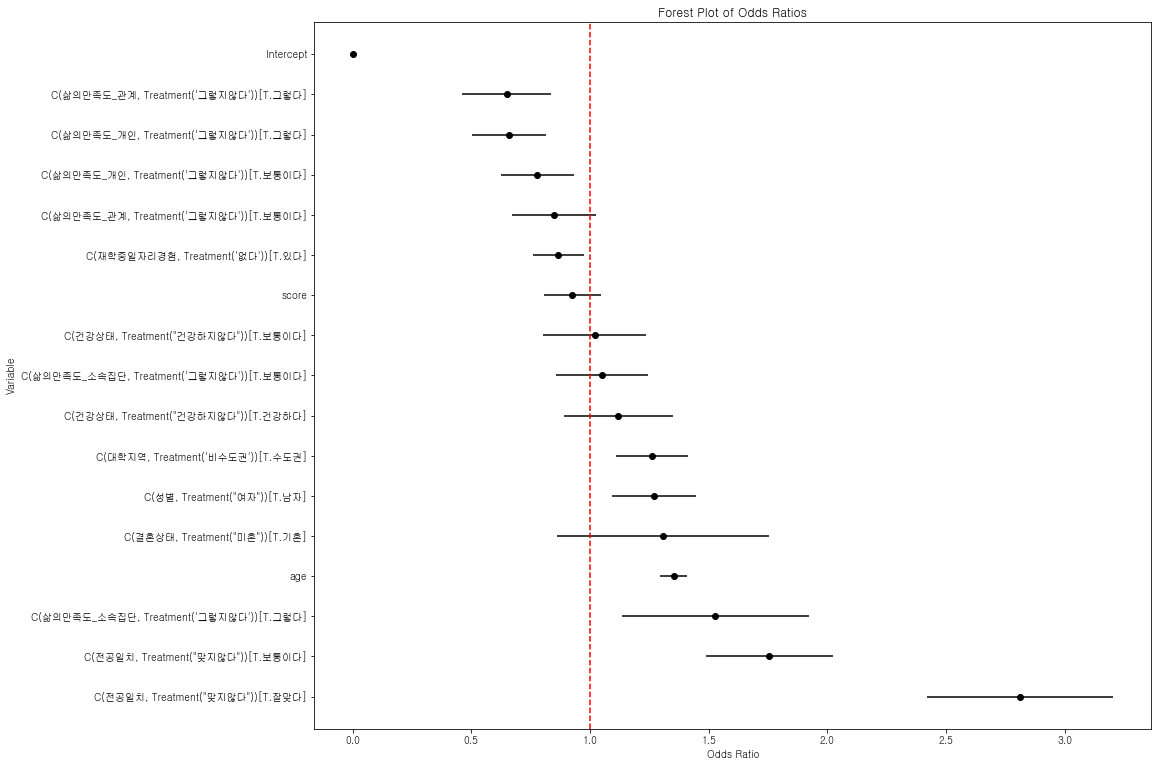

In [32]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

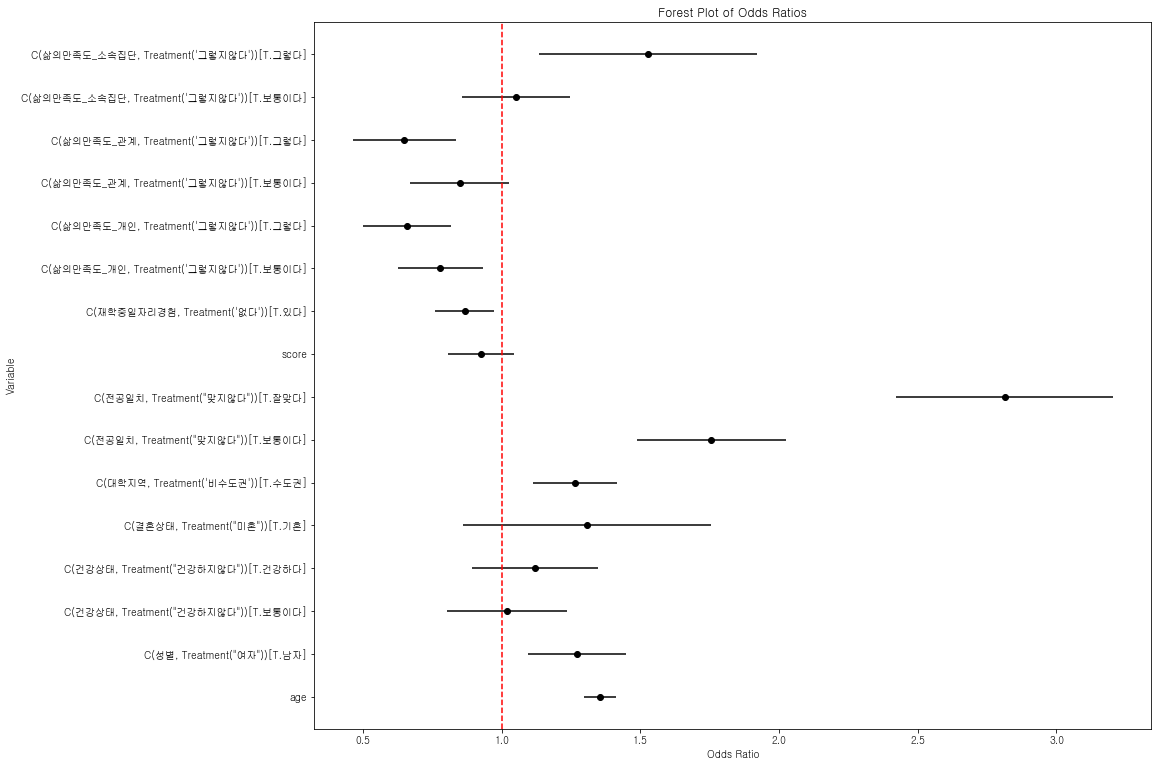

In [41]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['age', 'C(성별, Treatment("여자"))[T.남자]', 'C(건강상태, Treatment("건강하지않다"))[T.보통이다]', 'C(건강상태, Treatment("건강하지않다"))[T.건강하다]',
            'C(결혼상태, Treatment("미혼"))[T.기혼]', "C(대학지역, Treatment('비수도권'))[T.수도권]", 'C(전공일치, Treatment("맞지않다"))[T.보통이다]',
            'C(전공일치, Treatment("맞지않다"))[T.잘맞다]', 'score', "C(재학중일자리경험, Treatment('없다'))[T.있다]",
            "C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]", "C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",
            "C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",
            "C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]"]

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

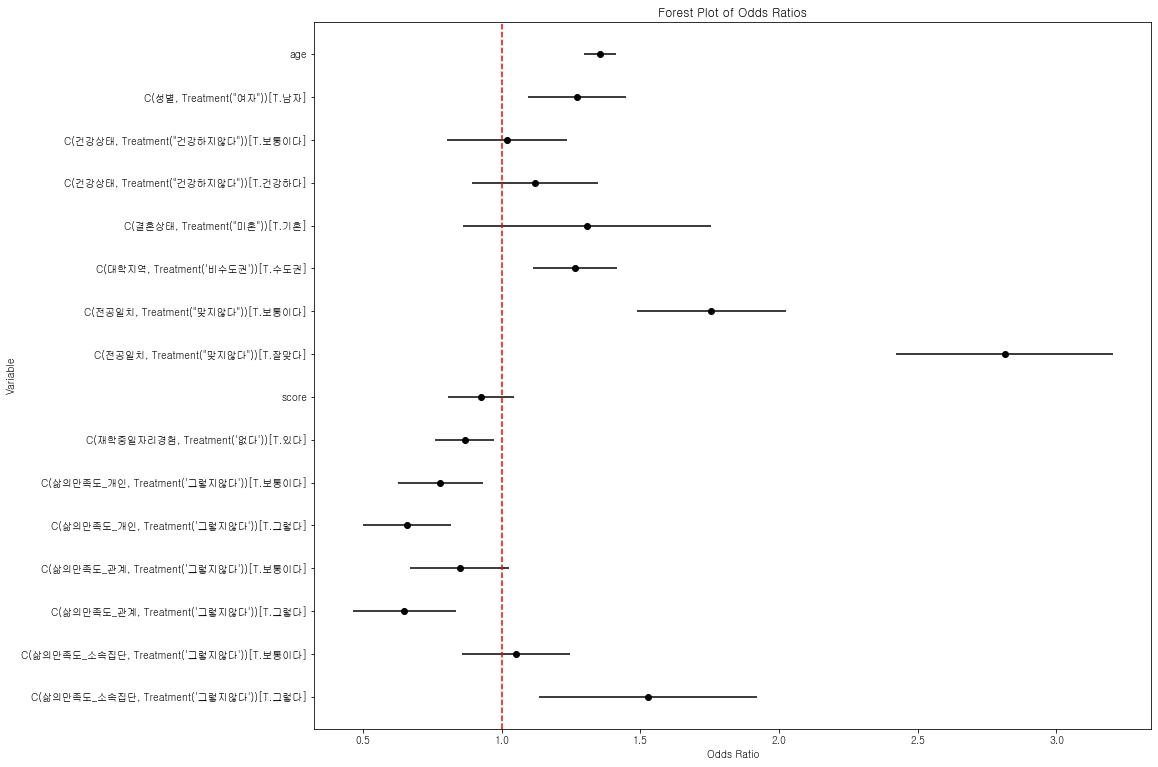

In [43]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['age', 'C(성별, Treatment("여자"))[T.남자]', 'C(건강상태, Treatment("건강하지않다"))[T.보통이다]', 'C(건강상태, Treatment("건강하지않다"))[T.건강하다]',
            'C(결혼상태, Treatment("미혼"))[T.기혼]', "C(대학지역, Treatment('비수도권'))[T.수도권]", 'C(전공일치, Treatment("맞지않다"))[T.보통이다]',
            'C(전공일치, Treatment("맞지않다"))[T.잘맞다]', 'score', "C(재학중일자리경험, Treatment('없다'))[T.있다]",
            "C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]", "C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",
            "C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",
            "C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]"]

var_order_reversed = var_order[::-1]

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order_reversed]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()